# Python人脸识别库face_recognition使用教程

face_recognition号称是世界上最简单的开源人脸识别库，可以通过Python或命令行识别和操作人脸。face_recognition提供了十分完整的技术文档和应用实例，人脸识别初学者建议研究该库上手。face_recognition的官方代码仓库为：[face_recognition](https://github.com/ageitgey/face_recognition)。face_recognition也有自己的官方中文文档，该文档详情见：[face_recognition中文使用说明](https://github.com/ageitgey/face_recognition/blob/master/README_Simplified_Chinese.md)。

本文所有的代码和大部分测试图像来自于face_recognition官方代码仓库的examples文件夹。实际使用建议看看官方文档的函数接口说明[face_recognition函数接口](https://face-recognition.readthedocs.io/)。

face_recognition中的人脸识别模型来自开源的机器学习库Dlib，Dlib的官方代码仓库见：[dlib]( https://github.com/davisking/dlib)。大部分模型用Labeled Faces in the Wild人脸数据集进行测试，有高达99.38%的准确率。但对小孩和亚洲人脸的识别准确率尚待提升。Labeled Faces in the Wild是美国麻省大学安姆斯特分校（University of Massachusetts Amherst)制作的人脸数据集，该数据集包含了从网络收集的13,000多张面部图像。该数据集算是一个非常小型的人脸数据集。

总体而言这个项目的人脸识别模型是基于成年人的，在孩子身上效果可能会一般。face_recognition一般学习代码使用或者研究源代码比较好，离工程应用还是有一定的距离。

# 1 face_recognition安装与相关知识

face_recognition支持linux，mac和windows系统，推荐linux系统使用face_recognition。安装face_recognition库之前需要安装dlib的python库。dlib的python库具体安装说明见：[[常用工具] dlib编译调用指南](https://blog.csdn.net/LuohenYJ/article/details/116069422)中的第四节。注意windows下的dlib库安装不那么容易，多查查文档。

当dlib安装好后，输入以下命令安装face_recognition。

> pip install face_recognition

人脸识别通用流程一般有人脸检测，人脸对齐和人脸识别三步：

+ 1 人脸检测/人脸定位 face detection and location：人脸检测就是在图片中找到人脸的具体位置，并输出包含人脸位置的边界矩形框。某些检测算法可以同时输出人脸相应的关键点。
+ 2 人脸对齐 face alignment：所谓的人脸对齐就是有时候人脸的角度不正，根据关键点检测结果通过图像变换或其他方法，将人脸上对准到一个预设的固定位置上（通常是正脸）。这样使得不同人脸的眼睛，鼻子都被放在同一个位置，大大提高识别精度。
+ 3 人脸识别 face recognition：人脸识别有很多应用方向，但是目的都是识别当前人脸对应哪个人。

简单的人脸识别通用流程示意图如下图所示。在face_recognition中所有代码都有涉及这些步骤；但是人脸对齐是直接调用dlib代码，没有实例说明。

![](https://gitee.com/luohenyueji/article_picture_warehouse/raw/master/Python-Study-Notes/Face/%5B%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%5D%20Python%E4%BA%BA%E8%84%B8%E8%AF%86%E5%88%AB%E5%BA%93face_recognition%E4%BD%BF%E7%94%A8%E6%95%99%E7%A8%8B/img/img1.jpg)

当然在成熟的商业工程应用不只有这三个部分，比如还有人脸质量判断，活体检测之类的，但是一般的项目都包含这三大步骤。关于人脸识别的更多介绍见：https://www.cnblogs.com/xiaoyh/p/11874270.html


# 2 人脸检测/定位

本部分主要是对人脸进行检测和定位，并输出人脸相应的矩形框。主要用到的face_recognition内置函数有：

+ face_recognition.api.face_locations(img, number_of_times_to_upsample=1, model='hog')
  - 用途：人脸检测，返回图像中人脸边界框的数组
  - img：输入图像，numpy数组
  - number_of_times_to_upsample：对图像进行上采样次数以找到更小的人脸，默认为1
  - model：检测模型，默认是hog机器学习模型，另外可设置cnn选择卷积神经网络模型以提高检测精度
  - 返回：包含多张人脸边界框的list数组，边界框数据以人脸(top, right, bottom, left) 顺序表示
  
+ face_recognition.api.load_image_file(file, mode='RGB')
  - 用途：加载图像
  - file：图像路径名
  - mode：图像颜色类型，设置RGB表示返回RGB图像，设置'L'表示返回灰度图像
  - 返回：numpy数组
 

## 2.1 基于机器学习实现人脸检测

来自examples/find_faces_in_picture.py 

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 142, Left: 349, Bottom: 409, Right: 617


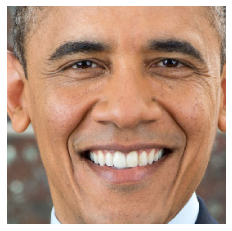

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import face_recognition

# 通过PIL加载图片
image = face_recognition.load_image_file("test_img/obama.jpg")
# 基于hog机器学习模型进行人脸识别，不能使用gpu加速
face_locations = face_recognition.face_locations(image)

# 找到几张人脸
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # 打印人脸信息
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # 提取人脸
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    # jupyter 绘图
    # pil_image.show()
    plt.imshow(pil_image)
    plt.axis('off')    
    plt.show()

## 2.2 基于卷积神经网络实现人脸检测

来自examples/find_faces_in_picture_cnn.py 

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 154, Left: 375, Bottom: 390, Right: 611


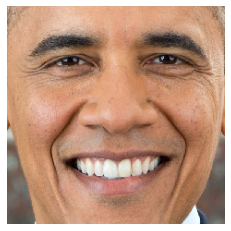

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import face_recognition

# 通过PIL加载图片
image = face_recognition.load_image_file("test_img/obama.jpg")

# 基于cnn识别人脸,是否使用gpu看装机环境
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # 打印人脸信息
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # 提取人脸
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    # jupyter 绘图
    # pil_image.show()
    plt.imshow(pil_image)
    plt.axis('off')    
    plt.show()

## 2.3 人脸马赛克

来自examples/blur_faces_on_webcam.py 

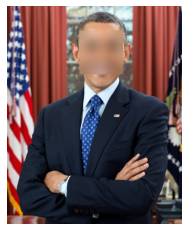

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import face_recognition
import cv2

frame = cv2.imread("test_img/obama.jpg")

# 缩小图像以加快速度
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

# 找到人脸
face_locations = face_recognition.face_locations(small_frame, model="cnn")

for top, right, bottom, left in face_locations:
    # 提取边界框在原图比例的边界框
    top *= 4
    right *= 4
    bottom *= 4
    left *= 4

# 提取人脸
face_image = frame[top:bottom, left:right]

# 高斯模糊人脸
face_image = cv2.GaussianBlur(face_image, (99, 99), 30)

# 原图人脸替换
frame[top:bottom, left:right] = face_image

# 展示图像
img = frame[:,:,::-1] 
plt.axis('off')
plt.imshow(img)

# 3 人脸关键点识别

本部分主要是对人脸进行关键点识别，并输出人脸特征位置。主要用到的face_recognition内置函数有：

+ face_recognition.api.face_landmarks(face_image, face_locations=None, model='large')
  - 用途：人脸关键点识别，返回图像人脸特征位置的字典
  - face_image：输入图像，numpy数组
  - face_locations：要识别的位置列表（可选）
  - model：使用的识别模型。默认值为large表示大模型。small表示小模型，但只返回五个特征点
  - 返回：特征位置（眼睛、鼻子等）的字典列表

## 3.1 提取图像中的人脸关键点

来自examples/find_facial_features_in_picture.py 

I found 2 face(s) in this photograph.


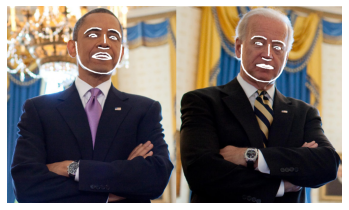

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw
import face_recognition

# 通过PIL加载图片
image = face_recognition.load_image_file("test_img/two_people.jpg")

# 找到图像中所有人脸的所有面部特征，返回字典
face_landmarks_list = face_recognition.face_landmarks(image)

# 发现人脸数
print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# 创建展示结果的图像
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

# 绘制关键点
for face_landmarks in face_landmarks_list:

    # 打印此图像中每个面部特征的位置
    # for facial_feature in face_landmarks.keys():
       # print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # 用一条线勾勒出图像中的每个面部特征
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)


# jupyter 绘图
# pil_image.show()
plt.imshow(pil_image)
plt.axis('off')    
plt.show()

## 3.2 人脸涂色

来自examples/digital_makeup.py 

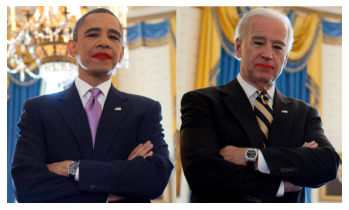

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import face_recognition

# 通过PIL加载图片
image = face_recognition.load_image_file("test_img/two_people.jpg")

# 找到图像中所有人脸的所有面部特征，返回字典
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)

# 绘图
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # 眉毛涂色
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # 嘴唇涂色
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # 眼睛涂色
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # 眼线涂色
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

# jupyter 绘图
# pil_image.show()
plt.imshow(pil_image)
plt.axis('off')
plt.show()

## 3.3 人眼睁闭状态识别

来自examples / blink_detection.py

该部分代码作用为根据人眼关键点数据计算人眼的纵横比。人眼睁开的时候纵横比较高，人眼闭上的时候纵横比较小。如果眼睛闭上次数超过设定阈值，则输出人眼处于闭眼状态。

frame 0 | EYES OPENED 


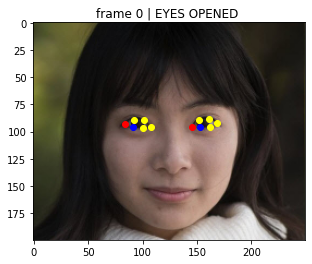

frame 1 | MAYBE EYES CLOSED 


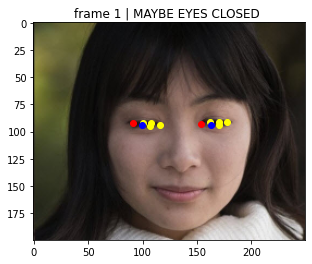

frame 2 | MAYBE EYES CLOSED 


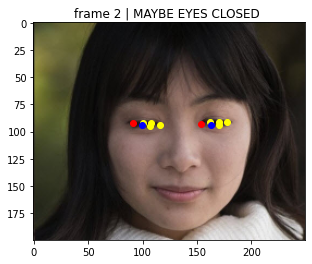

frame 3 | EYES CLOSED


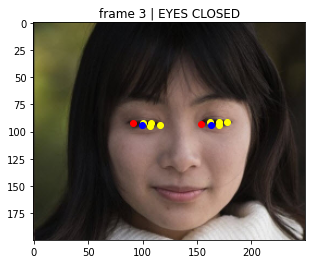

frame 4 | EYES OPENED 


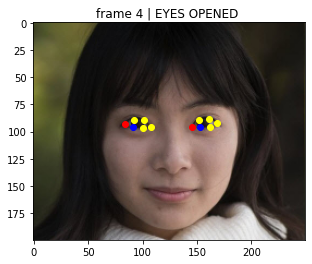

In [6]:
import matplotlib.pylab as plt
import face_recognition
import cv2
from scipy.spatial import distance as dist

# 这是一个检测眼睛状态的演示
# 人眼闭上次数超过设定阈值EYES_CLOSED_SECONDS，判定人眼处于闭眼状态
EYES_CLOSED_SECONDS = 2


def main():
    # 闭眼次数
    closed_count = 0
    # 读取两张图像模仿人睁闭眼
    img_eye_opened = cv2.imread('test_img/eye_opened.jpg')
    img_eye_closed = cv2.imread('test_img/eye_closed.jpg')
    # 设置图像输入序列，前1张睁眼，中间3张闭眼，最后1张睁眼
    frame_inputs = [img_eye_opened] + [img_eye_closed] * 3 + [img_eye_opened] * 1

    for frame_num, frame in enumerate(frame_inputs):
        # 缩小图片
        small_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
        # bgr通道变为rgb通道
        rgb_small_frame = small_frame[:, :, ::-1]
        # 人脸关键点检测
        face_landmarks_list = face_recognition.face_landmarks(rgb_small_frame)
        # 没有检测到关键点
        if len(face_landmarks_list) < 1:
            continue

        # 获得人眼特征点位置
        for face_landmark in face_landmarks_list:
            # 每只眼睛有六个关键点，以眼睛最左边顺时针顺序排列
            left_eye = face_landmark['left_eye']
            right_eye = face_landmark['right_eye']

            # 计算眼睛的纵横比ear，ear这里不是耳朵的意思
            ear_left = get_ear(left_eye)
            ear_right = get_ear(right_eye)
            # 判断眼睛是否闭上
            # 如果两只眼睛纵横比小于0.2，视为眼睛闭上
            closed = ear_left < 0.2 and ear_right < 0.2
            # 设置眼睛检测闭上次数
            if closed:
                closed_count += 1
            else:
                closed_count = 0
            # 如果眼睛检测闭上次数大于EYES_CLOSED_SECONDS，输出眼睛闭上
            if closed_count > EYES_CLOSED_SECONDS:
                eye_status = "frame {} | EYES CLOSED".format(frame_num)
            elif closed_count > 0:
                eye_status = "frame {} | MAYBE EYES CLOSED ".format(frame_num)
            else:
                eye_status = "frame {} | EYES OPENED ".format(frame_num)
            print(eye_status)

            plt.imshow(rgb_small_frame)
            # 左右眼轮廓第一个关键点颜色为red，最后一个关键点颜色为blue，其他关键点为yellow
            color = ['red'] + ['yellow'] * int(len(left_eye) - 2) + ['blue']
            # 按照顺序依次绘制眼睛关键点
            for index in range(len(left_eye)):
                leye = left_eye[index]
                reye = right_eye[index]
                plt.plot(leye[0], leye[1], 'bo', color=color[index])
                plt.plot(reye[0], reye[1], 'bo', color=color[index])
                plt.title(eye_status)

            plt.show()

# 计算人眼纵横比
def get_ear(eye):
    # 计算眼睛轮廓垂直方向上下关键点的距离
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])

    # 计算水平方向上的关键点的距离
    C = dist.euclidean(eye[0], eye[3])

    # 计算眼睛的纵横比
    ear = (A + B) / (2.0 * C)

    # 返回眼睛的纵横比
    return ear


if __name__ == "__main__":
    main()

# 4 人脸识别

本部分主要是对人脸进行识别，提供多种实际任务案例。主要用到的face_recognition内置函数有：

+ face_recognition.api.face_encodings(face_image, known_face_locations=None, num_jitters=1, model='small')
  - 用途：返回图像中每个人脸的128维人脸特征
  - face_image：输入图像，numpy数组
  - known_face_locations：每个人脸的边界框（可选），能够大大提高识别速度
  - num_jitters：计算人脸特征时重新采样人脸的次数。更高更准确，但更慢，即设置为100慢100倍
  - model：使用的识别模型，默认值为small表示小模型，只返回五个特征点；可设置为large
  - 返回：包含人脸特征的列表
  
+ face_recognition.api.compare_faces(known_face_encodings, face_encoding_to_check, tolerance=0.6)
  - 用途：将人脸特征与候选人脸特征进行比较，以查看它们是否匹配。
  - known_face_encodings：已知人脸特征列表
  - face_encoding_to_check：与已知人脸特征列表进行比较的单个人脸特征
  - tolerance：人脸距离越小表示人脸越相近，当人脸距离小于tolerance，表示是同一个人；0.6是默认值，也是作者认为的最佳值（实际有所出入）
  - 返回：包含True或者False的列表，以表示是否为同一个人脸
  
+ face_recognition.api.face_distance(face_encodings, face_to_compare)
  - 用途：给定一个人脸特征列表，将它们与已知的人脸特征进行比较，并获得人脸特征向量之间的欧几里德距离，距离越小面孔越相似。
  - face_encodings：已知的人脸特征列表
  - face_to_compare：未知的人脸特征列表
  - 返回：代表距离的numpy数组，和face_encodings的排序方式一样

## 4.1 人脸比对

来自examples/recognize_faces_in_pictures.py 

该部分代码就是输入两张已知人脸图像和一张未知人脸图像，看未知人脸图像和已知人脸的哪一张图像表示的是同一个人。

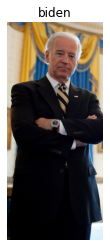

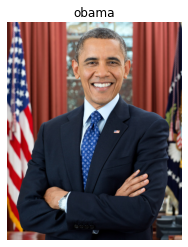

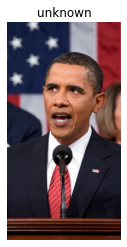

Is the unknown face a picture of Biden? False
Is the unknown face a picture of Obama? True
Is the unknown face a new person that we've never seen before? False


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import face_recognition

# 通过PIL加载图片
biden_image = face_recognition.load_image_file("test_img/biden.jpg")
obama_image = face_recognition.load_image_file("test_img/obama.jpg")
unknown_image = face_recognition.load_image_file("test_img/obama2.jpg")

plt.imshow(biden_image)
plt.title('biden')
plt.axis('off')
plt.show()
plt.imshow(obama_image)
plt.title('obama')
plt.axis('off')
plt.show()
plt.imshow(unknown_image)
plt.title('unknown')
plt.axis('off')
plt.show()

# 获取输入图像文件中每个人脸的人脸特征，人脸特征维度为128
# 由于输入图像中可能有多张脸，因此它会返回一个特征列表。
# 默认输入图像只有一张人脸，只关心每个图像中的第一个特征，所以设置特征获取索引为0
# 建议单步看看该函数运行机制
try:
    biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
    obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
    unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
except IndexError:
    # 没有找到人脸的情况
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()

# 已知人脸列表，按照顺序为拜登的人脸特征，奥巴马的人脸特征
known_faces = [
    biden_face_encoding,
    obama_face_encoding
]

# 如果未知人脸与已知人脸数组中的某个人匹配，则匹配结果为真
# 这个函数调用了face_distance人脸特征距离计算函数，可以单步调试看看源代码
results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

# 是否和第一个人匹配
print("Is the unknown face a picture of Biden? {}".format(results[0]))
# 是否和第二个人匹配
print("Is the unknown face a picture of Obama? {}".format(results[1]))
# 这张人脸是否曾经见过
print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

## 4.2 人脸识别之后在原图上画框并标注姓名

来自examples/identify_and_draw_boxes_on_faces.py

该部分代码就是输入两张已知人脸图像和一张未知人脸图像，然后进行人脸识别并在未知人脸图像标注各个人脸身份信息

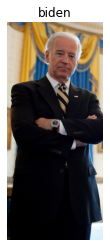

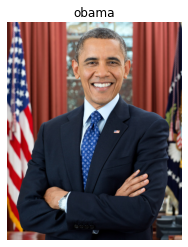

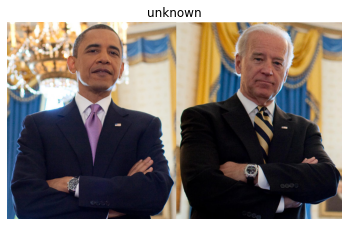

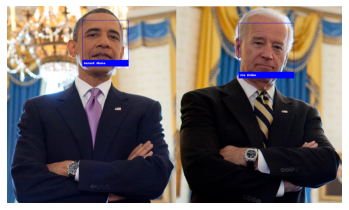

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

# 加载第一张示例图片并提取特征
obama_image = face_recognition.load_image_file("test_img/obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# 加载第二张示例图片并提取特征
biden_image = face_recognition.load_image_file("test_img/biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# 创建已知人脸特征和其名字的数据
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# 加载未知人脸图片
unknown_image = face_recognition.load_image_file("test_img/two_people.jpg")

# 人脸检测
face_locations = face_recognition.face_locations(unknown_image)
# 人脸特征提取
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# 查看输入图像
plt.imshow(biden_image)
plt.title('biden')
plt.axis('off')
plt.show()
plt.imshow(obama_image)
plt.title('obama')
plt.axis('off')
plt.show()
plt.imshow(unknown_image)
plt.title('unknown')
plt.axis('off')
plt.show()

# 绘图
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

# 未知人脸图片中每张人脸处理
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # 判断和哪张人脸匹配
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # 结果匹配方式1
    # 有多张人脸匹配成功，只以匹配的第一张人脸为结果
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # 结果匹配方式2
    # 一种更好的结果匹配方式，使用距离新面孔最小的已知面孔为结果
    # 计算已知人脸和未知人脸特征向量的距离，距离越小表示两张人脸为同一个人的可能性越大
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    # 提取和未知人脸距离最小的已知人脸编号
    best_match_index = np.argmin(face_distances)
    # 提取匹配的已知人脸名
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # 为人脸画边界框
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # 在人脸边界框下方绘制该人脸所属人的名字
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

del draw

# jupyter 绘图
# pil_image.show()
plt.imshow(pil_image)
plt.axis('off')
plt.show()

# 保存识别结果
# pil_image.save("image_with_boxes.jpg")

## 4.3 在不同精度上进行人脸比对

来自examples/face_distance.py

该部分代码功能类似4.1，区别在于根据人脸特征向量的距离和不同距离阈值来判断两张人脸是否表示的是同一个人

In [9]:
import face_recognition

# 加载图像
known_obama_image = face_recognition.load_image_file("test_img/obama.jpg")
known_biden_image = face_recognition.load_image_file("test_img/biden.jpg")

# 获得人脸图像特征
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]
biden_face_encoding = face_recognition.face_encodings(known_biden_image)[0]

known_encodings = [
    obama_face_encoding,
    biden_face_encoding
]

# 加载未知人脸图像
image_to_test = face_recognition.load_image_file("test_img/obama2.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# 计算未知人脸和已知人脸的距离
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

# 查看不同距离阈值下的人脸匹配结果
for i, face_distance in enumerate(face_distances):
    # 打印距离
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    # 当阈值为0.6，是否匹配
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    # 当阈值为更严格的0.5，是否匹配
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(
        face_distance < 0.5))
    print()

The test image has a distance of 0.35 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.82 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False



## 4.4 基于K最近邻KNN分类算法进行人脸识别

来自examples/face_recognition_knn.py 

该部分代码和前面部分代码是一样的，只是最后提取人脸特征后用KNN近邻算法进行分类，而不是用距离来判断。

Training KNN classifier...
Training complete!
Looking for faces in alex_lacamoire1.jpg
- Found alex_lacamoire at (633, 206)


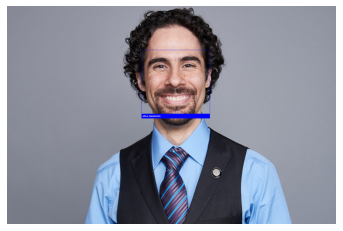

Looking for faces in johnsnow_test1.jpg
- Found kit_harington at (262, 180)


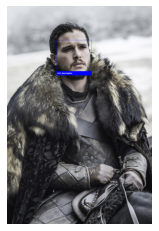

Looking for faces in kit_with_rose.jpg
- Found rose_leslie at (79, 130)
- Found kit_harington at (247, 92)


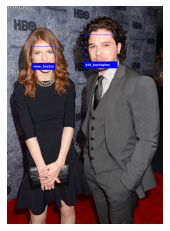

Looking for faces in obama1.jpg
- Found obama at (546, 204)


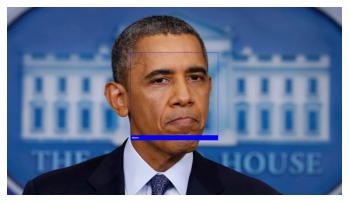

Looking for faces in obama_and_biden.jpg
- Found biden at (737, 449)
- Found obama at (1133, 390)
- Found unknown at (1594, 1062)


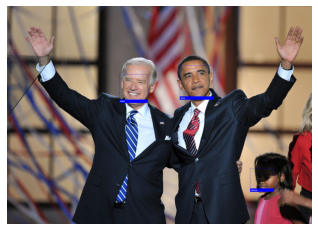

In [10]:
%matplotlib inline
"""
使用k-最近邻（KNN）算法进行人脸识别的示例
"""

from matplotlib import pyplot as plt
import math
from sklearn import neighbors
import os
import os.path
import pickle
from PIL import Image, ImageDraw
import face_recognition
from face_recognition.face_recognition_cli import image_files_in_folder

ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}


def train(train_dir, model_save_path=None, n_neighbors=None, knn_algo='ball_tree', verbose=False):
    """
    训练k近邻分类器进行人脸识别。
    :param train_dir: 包含每个已知人员及其人脸的目录。
     Structure:
        <train_dir>/
        ├── <person1>/
        │   ├── <somename1>.jpeg
        │   ├── <somename2>.jpeg
        │   ├── ...
        ├── <person2>/
        │   ├── <somename1>.jpeg
        │   └── <somename2>.jpeg
        └── ...
    :param model_save_path: (可选) 模型保存目录
    :param n_neighbors: (可选) 分类中要加权的邻居数。如果未指定，则自动选择，就是k-NN的k的值，选取最近的k个点
    :param knn_algo: (可选) knn底层的搜索算法
    :param verbose: 打印训练信息
    :return: 返回训练好的模型
    """
    X = []
    y = []

    # 读取人员路径
    for class_dir in os.listdir(train_dir):
        if not os.path.isdir(os.path.join(train_dir, class_dir)):
            continue

        # 读取当前人员的人脸图片
        for img_path in image_files_in_folder(os.path.join(train_dir, class_dir)):
            # 加载图片
            image = face_recognition.load_image_file(img_path)
            # 人脸检测
            face_bounding_boxes = face_recognition.face_locations(image)

            if len(face_bounding_boxes) != 1:
                # 没有人就跳过当前图片
                if verbose:
                    print("Image {} not suitable for training: {}".format(img_path, "Didn't find a face" if len(
                        face_bounding_boxes) < 1 else "Found more than one face"))
            else:
                # 保存人脸特征和类别
                X.append(face_recognition.face_encodings(image, known_face_locations=face_bounding_boxes)[0])
                y.append(class_dir)

    # 自定设置n_neighbors
    if n_neighbors is None:
        n_neighbors = int(round(math.sqrt(len(X))))
        if verbose:
            print("Chose n_neighbors automatically:", n_neighbors)

    # 训练KNN分类器
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=knn_algo, weights='distance')
    knn_clf.fit(X, y)

    # 保存分类器
    if model_save_path is not None:
        with open(model_save_path, 'wb') as f:
            pickle.dump(knn_clf, f)

    return knn_clf


def predict(X_img_path, knn_clf=None, model_path=None, distance_threshold=0.6):
    """
    使用经过训练的KNN分类器识别给定图像中的人脸
    :param X_img_path: 输入图像
    :param knn_clf: (可选) knn模型，和model_path必须有一个可用
    :param model_path: (可选) knn模型路径，和knn_clf必须有一个可用
    :param distance_threshold: (可选) 人脸分类的距离阈值。阈值越大，就越容易误报。
    :return: 人脸对应的人名和其边界框
    """
    if not os.path.isfile(X_img_path) or os.path.splitext(X_img_path)[1][1:] not in ALLOWED_EXTENSIONS:
        raise Exception("Invalid image path: {}".format(X_img_path))

    if knn_clf is None and model_path is None:
        raise Exception("Must supply knn classifier either thourgh knn_clf or model_path")

    # 加载模型
    if knn_clf is None:
        with open(model_path, 'rb') as f:
            knn_clf = pickle.load(f)

    # 读取图片和进行人脸检测
    X_img = face_recognition.load_image_file(X_img_path)
    X_face_locations = face_recognition.face_locations(X_img)

    # 如果没有检测到人脸就返回空list
    if len(X_face_locations) == 0:
        return []

    # 提取人脸特征
    faces_encodings = face_recognition.face_encodings(X_img, known_face_locations=X_face_locations)

    # 使用K近邻进行分类
    closest_distances = knn_clf.kneighbors(faces_encodings, n_neighbors=1)
    are_matches = [closest_distances[0][i][0] <= distance_threshold for i in range(len(X_face_locations))]

    # 返回预测结果
    return [(pred, loc) if rec else ("unknown", loc) for pred, loc, rec in
            zip(knn_clf.predict(faces_encodings), X_face_locations, are_matches)]


def show_prediction_labels_on_image(img_path, predictions):
    """
    预测结果可视化
    :param img_path: 预测图像
    :param predictions: 预测结果
    :return:
    """
    pil_image = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(pil_image)

    for name, (top, right, bottom, left) in predictions:
        # 画框
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

        # 设置名字，需要用uft-8编码
        name = name.encode("UTF-8")

        # 标注人名
        text_width, text_height = draw.textsize(name)
        draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
        draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

    del draw

    # jupyter 绘图
    # pil_image.show()
    plt.imshow(pil_image)
    plt.axis('off')
    plt.show()


if __name__ == "__main__":
    # 训练图片下载地址：https://github.com/ageitgey/face_recognition/tree/master/examples/knn_examples
    # STEP 1 训练KNN分类器
    print("Training KNN classifier...")
    classifier = train("./test_img/knn_examples/train", model_save_path="trained_knn_model.clf", n_neighbors=2)
    print("Training complete!")

    # STEP 2 使用训练好的KNN分类器对测试的人脸图像进行识别
    for image_file in os.listdir("./test_img/knn_examples/test"):
        # 待测试人脸图像路径
        full_file_path = os.path.join("./test_img/knn_examples/test", image_file)

        print("Looking for faces in {}".format(image_file))

        # 用经过训练的分类器模型查找图像中的所有人
        predictions = predict(full_file_path, model_path="trained_knn_model.clf")

        # 打印结果
        for name, (top, right, bottom, left) in predictions:
            print("- Found {} at ({}, {})".format(name, left, top))

        # 展示结果
        show_prediction_labels_on_image(os.path.join("./test_img/knn_examples/test", image_file), predictions)

## 4.5 基准性能测试

来自examples/benchmark.py

该部分代码实现一个非常简单的基准测试，可以让您了解人脸识别的每一步在您的系统上运行的速度

In [11]:
import timeit

# 这是一个非常简单的基准测试，可以让您了解人脸识别的每一步在您的系统上运行的速度。请注意，在较大的图像大小下，人脸检测变得非常缓慢
TEST_IMAGES = [
    "test_img/obama-240p.jpg",
    "test_img/obama-480p.jpg",
    "test_img/obama-720p.jpg",
    "test_img/obama-1080p.jpg"
]


# 测试函数
def run_test(setup, test, iterations_per_test=2, tests_to_run=3):
    """
    :param setup: 数据加载函数
    :param test: 数据测试函数
    :param iterations_per_test: 测试次数
    :param tests_to_run: 每轮测试调用函数多少次
    :return: execution_time单次函数推理时间，fps每秒处理次数
    """
    fastest_execution = min(timeit.Timer(test, setup=setup).repeat(tests_to_run, iterations_per_test))
    execution_time = fastest_execution / iterations_per_test
    fps = 1.0 / execution_time
    return execution_time, fps


# 以下设置不同的测试函数代码
# setup开头的是数据加载代码，test开头的是函数测试代码
setup_locate_faces = """
import face_recognition

image = face_recognition.load_image_file("{}")
"""

test_locate_faces = """
face_locations = face_recognition.face_locations(image)
"""

setup_face_landmarks = """
import face_recognition

image = face_recognition.load_image_file("{}")
face_locations = face_recognition.face_locations(image)
"""

test_face_landmarks = """
landmarks = face_recognition.face_landmarks(image, face_locations=face_locations)[0]
"""

setup_encode_face = """
import face_recognition

image = face_recognition.load_image_file("{}")
face_locations = face_recognition.face_locations(image)
"""

test_encode_face = """
encoding = face_recognition.face_encodings(image, known_face_locations=face_locations)[0]
"""

setup_end_to_end = """
import face_recognition

image = face_recognition.load_image_file("{}")
"""

test_end_to_end = """
encoding = face_recognition.face_encodings(image)[0]
"""

# 所有的基准测试都只使用一个CPU核心
print("Benchmarks (Note: All benchmarks are only using a single CPU core)")
print()

for image in TEST_IMAGES:
    size = image.split("-")[1].split(".")[0]
    print("Timings at {}:".format(size))

    # 测试人脸检测
    print(" - Face locations: {:.4f}s ({:.2f} fps)".format(
        *run_test(setup_locate_faces.format(image), test_locate_faces)))
    print(" - Face landmarks: {:.4f}s ({:.2f} fps)".format(
        *run_test(setup_face_landmarks.format(image), test_face_landmarks)))
    print(" - Encode face (inc. landmarks): {:.4f}s ({:.2f} fps)".format(
        *run_test(setup_encode_face.format(image), test_encode_face)))
    print(" - End-to-end: {:.4f}s ({:.2f} fps)".format(*run_test(setup_end_to_end.format(image), test_end_to_end)))
    print()

Benchmarks (Note: All benchmarks are only using a single CPU core)

Timings at 240p:
 - Face locations: 0.0819s (12.21 fps)
 - Face landmarks: 0.0029s (344.69 fps)
 - Encode face (inc. landmarks): 0.4879s (2.05 fps)
 - End-to-end: 0.5978s (1.67 fps)

Timings at 480p:
 - Face locations: 0.3257s (3.07 fps)
 - Face landmarks: 0.0028s (362.23 fps)
 - Encode face (inc. landmarks): 0.4959s (2.02 fps)
 - End-to-end: 0.8203s (1.22 fps)

Timings at 720p:
 - Face locations: 0.7046s (1.42 fps)
 - Face landmarks: 0.0028s (355.30 fps)
 - Encode face (inc. landmarks): 0.4993s (2.00 fps)
 - End-to-end: 1.1888s (0.84 fps)

Timings at 1080p:
 - Face locations: 1.5179s (0.66 fps)
 - Face landmarks: 0.0030s (334.93 fps)
 - Encode face (inc. landmarks): 0.4838s (2.07 fps)
 - End-to-end: 1.9404s (0.52 fps)



## 4.6 多线程人脸识别

来自facerec_from_webcam_multiprocessing.py

该部分代码实现多线程读取视频进行人脸识别，很简单但是实际不这样写，看看代码就好。

```
import face_recognition
import cv2
from multiprocessing import Process, Manager, cpu_count, set_start_method
import time
import numpy
import threading
import platform


# 多线程运行人脸识别
# 获取下一个线程的id
def next_id(current_id, worker_num):
    if current_id == worker_num:
        return 1
    else:
        return current_id + 1


# 获取上一个线程的id
def prev_id(current_id, worker_num):
    if current_id == 1:
        return worker_num
    else:
        return current_id - 1


# 读图线程
def capture(read_frame_list, Global, worker_num):
    # 读取视频
    video_capture = cv2.VideoCapture('./test_img/short_hamilton_clip.mp4')
    print("Width: %d, Height: %d, FPS: %d" % (video_capture.get(3), video_capture.get(4), video_capture.get(5)))

    while not Global.is_exit:
        # 判断是否该读图 确保当前缓存图像的线程和下一个处理图像的线程不是一个线程，以确保在处理线程开始前缓存图像
        if Global.buff_num != next_id(Global.read_num, worker_num):
            # 读取一张图像
            ret, frame = video_capture.read()
            read_frame_list[Global.buff_num] = frame # 保存对应图像处理线程要处理的图像
            Global.buff_num = next_id(Global.buff_num, worker_num) # 下一个要缓存图像的图像处理线程
        else:
            time.sleep(0.01)

    # 释放视频
    video_capture.release()


# 图片处理线程
def process(worker_id, read_frame_list, write_frame_list, Global, worker_num):
    known_face_encodings = Global.known_face_encodings
    known_face_names = Global.known_face_names
    while not Global.is_exit:

        # 等待读取图片 当线程是需要处理图像的线程时开始处理图像，同时要确保图像已经缓存
        while Global.read_num != worker_id or Global.read_num != prev_id(Global.buff_num, worker_num):
            # 判断是否退出
            if Global.is_exit:
                break

            time.sleep(0.01)

        # 延迟读取保证计算量
        time.sleep(Global.frame_delay)

        # 读取一张图像
        frame_process = read_frame_list[worker_id]

        # 设置下一个读取视频的线程
        Global.read_num = next_id(Global.read_num, worker_num)

        # 交换通道
        rgb_frame = frame_process[:, :, ::-1]

        # 人脸识别
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

        # 人脸绘图
        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            # 是否和已知人脸匹配
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

            name = "Unknown"

            # 如果有匹配人脸，就替换为匹配到人脸的名字
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]

            # 绘制边界框
            cv2.rectangle(frame_process, (left, top), (right, bottom), (0, 0, 255), 2)

            # 绘制人脸标签
            cv2.rectangle(frame_process, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame_process, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

        # 当前线程是否允许保存图像
        while Global.write_num != worker_id:
            time.sleep(0.01)

        # 保存结果
        write_frame_list[worker_id] = frame_process

        # 下一个保存图像的图像处理线程
        Global.write_num = next_id(Global.write_num, worker_num)


if __name__ == '__main__':

    # Macos设置
    if platform.system() == 'Darwin':
        set_start_method('forkserver')

    # 全局变量
    Global = Manager().Namespace()
    Global.buff_num = 1 # 正在缓存图像的图像处理线程
    Global.read_num = 1 # 正在处理图像的图像线程
    Global.write_num = 1 # 正在保存结果的图像处理线程
    Global.frame_delay = 0 # 延迟时间
    Global.is_exit = False # 是否退出
    read_frame_list = Manager().dict()
    write_frame_list = Manager().dict()

    # 处理线程数
    if cpu_count() > 2:
        # 减1是为了留出一个线程读取视频
        worker_num = cpu_count() - 1
    else:
        worker_num = 2

    # 子线程列表
    p = []

    # 创建一个线程来捕获帧（如果使用子线程，它将在Mac上崩溃）
    # 线程0为读图线程
    p.append(threading.Thread(target=capture, args=(read_frame_list, Global, worker_num,)))
    p[0].start()

    # 读取已有图像
    obama_image = face_recognition.load_image_file("./test_img/obama.jpg")
    obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
    biden_image = face_recognition.load_image_file("./test_img/lin-manuel-miranda.png")
    biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

    # 创建已有数据信息
    Global.known_face_encodings = [
        obama_face_encoding,
        biden_face_encoding
    ]
    Global.known_face_names = [
        "Barack Obama",
        "lin-manuel-miranda."
    ]

    # 创建图像处理子线程
    for worker_id in range(1, worker_num + 1):
        p.append(Process(target=process, args=(worker_id, read_frame_list, write_frame_list, Global, worker_num,)))
        p[worker_id].start()

    # 开始读取视频
    last_num = 1 # 已经处理好的图像序列号
    fps_list = []
    tmp_time = time.time()
    while not Global.is_exit:
        while Global.write_num != last_num:
            last_num = int(Global.write_num)

            # 计算FPS
            delay = time.time() - tmp_time
            tmp_time = time.time()
            fps_list.append(delay)
            if len(fps_list) > 5 * worker_num:
                fps_list.pop(0)
            fps = len(fps_list) / numpy.sum(fps_list)
            print("fps: %.2f" % fps)

            # 根据延时动态调整检测性能
            if fps < 6:
                Global.frame_delay = (1 / fps) * 0.75
            elif fps < 20:
                Global.frame_delay = (1 / fps) * 0.5
            elif fps < 30:
                Global.frame_delay = (1 / fps) * 0.25
            else:
                Global.frame_delay = 0

            # 展示结果
            cv2.imshow('Video', write_frame_list[prev_id(Global.write_num, worker_num)])

        # 退出
        if cv2.waitKey(1) & 0xFF == ord('q'):
            Global.is_exit = True
            break

        time.sleep(0.01)
```

# 5 参考
## 5.1 代码

+ [face_recognition](https://github.com/ageitgey/face_recognition)
+ [dlib]( https://github.com/davisking/dlib)
+ [face_recognition函数接口](https://face-recognition.readthedocs.io/)

## 5.2 文档

+ [face_recognition中文使用说明](https://github.com/ageitgey/face_recognition/blob/master/README_Simplified_Chinese.md)
+ [[常用工具] dlib编译调用指南](https://blog.csdn.net/LuohenYJ/article/details/116069422)
+ [人脸检测和人脸识别原理](https://www.cnblogs.com/xiaoyh/p/11874270.html)